# Required libraries

In [2]:
pwd

'/home/wsuser/work'

In [90]:
!pip install tensorflow==2.7.1

     |████████████████████████████████| 495.2 MB 38 kB/s s eta 0:00:01   |▏                               | 3.0 MB 20.2 MB/s eta 0:00:25         | 79.4 MB 81.5 MB/s eta 0:00:06        | 210.3 MB 21.5 MB/s eta 0:00:14
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
     |████████████████████████████████| 14.1 MB 68.5 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2


In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ig
train = ig(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test = ig(rescale=1./255)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

# Image Preprocessing

In [95]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FueL74nKZoJaZFI1dUyNKjjVvqQM_-lOp72BOePpEYB1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imagee-donotdelete-pr-15rxbtmgivqno3'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [96]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [97]:
pwd

'/home/wsuser/work'

In [98]:
import os 
f = os.listdir('/home/wsuser/work/Dataset/training_set')

In [99]:
xtrain = train.flow_from_directory('/home/wsuser/work/Dataset/training_set', target_size=(64,64), batch_size=300, class_mode='categorical', color_mode= 'grayscale')
xtest = train.flow_from_directory('/home/wsuser/work/Dataset/test_set', target_size=(64,64), batch_size=300, class_mode='categorical', color_mode= 'grayscale')

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


# Model Building

In [100]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(64,64,1), activation='relu')) #convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # pooling layer
model.add(Flatten()) #flatten layer
model.add(Dense(units=512, activation='relu')) #dense layer
model.add(Dense(units=9, activation='softmax'))  #dense layer

In [101]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model.fit_generator(xtrain, steps_per_epoch=24, epochs=10, validation_data=xtest, validation_steps=40)  #fit the model
model.save('aslpng1.h5')  #saving the model
                    

/tmp/wsuser/ipykernel_164/3057941158.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain, steps_per_epoch=24, epochs=10, validation_data=xtest, validation_steps=40)  #fit the model


Epoch 1/10
24/24 [==============================] - 27s 1s/step - loss: 1.2908 - accuracy: 0.6539 - val_loss: 0.5087 - val_accuracy: 0.8671
Epoch 2/10
24/24 [==============================] - 24s 972ms/step - loss: 0.2783 - accuracy: 0.9267
Epoch 3/10
24/24 [==============================] - 24s 980ms/step - loss: 0.1291 - accuracy: 0.9661
Epoch 4/10
24/24 [==============================] - 24s 978ms/step - loss: 0.0859 - accuracy: 0.9774
Epoch 5/10
24/24 [==============================] - 24s 988ms/step - loss: 0.0635 - accuracy: 0.9843
Epoch 6/10
24/24 [==============================] - 24s 983ms/step - loss: 0.0453 - accuracy: 0.9886
Epoch 7/10
24/24 [==============================] - 24s 980ms/step - loss: 0.0323 - accuracy: 0.9943
Epoch 8/10
24/24 [==============================] - 24s 986ms/step - loss: 0.0264 - accuracy: 0.9931
Epoch 9/10
24/24 [==============================] - 23s 966ms/step - loss: 0.0216 - accuracy: 0.9956
Epoch 10/10
24/24 [==============================] -

In [103]:
!tar -zcvf image.tgz aslpng1.h5

aslpng1.h5


In [104]:
ls -1

aslpng1.h5
Dataset/
image.tgz


In [105]:
!pip install watson-machine-learning-client --upgrade

In [106]:
from ibm_watson_machine_learning import APIClient
creds = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey" : "97DgboHol6ohPXN5vEhogPKMFUfucCzphULRoVAT__2r"
    
}
client = APIClient(creds)

In [107]:
client

In [108]:
def guid(client, spacename):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==spacename)['metadata']['id'])

In [109]:
space_id = guid(client, 'image')
print('space_ID = '+space_id)

space_ID = 7ea50334-1526-461a-9834-82065fe87b1b


In [110]:
client.set.default_space(space_id)

'SUCCESS'

In [111]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [112]:
software_spec = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_spec 

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [123]:
model_details=client.repository.store_model(model="image.tgz",meta_props={
client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"
})
model_id = client.repository.get_model_id(model_details)
model_id

'90eb33c6-c484-481b-b97f-24ddc6e3c71c'

In [124]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

# Test the model

In [117]:
#Import packages and load the saved model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import skimage

In [125]:
model = load_model('aslpng1.h5')

In [126]:
img=image.load_img(r'/home/wsuser/work/Dataset/test_set/A/1.png',
                   target_size=(64,64))

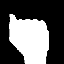

In [129]:
img